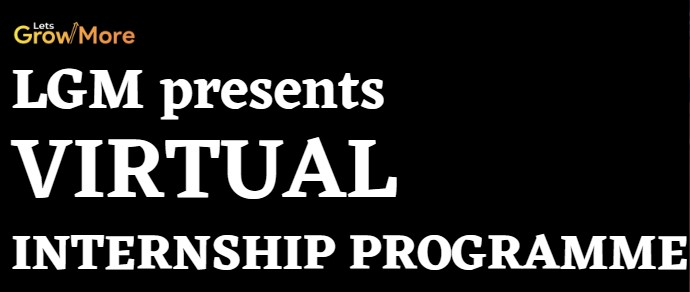

# **Task-1 : Iris Flowers Classification ML Project(Beginner Level Task)**
This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

***Dataset used link*** : http://archive.ics.uci.edu/ml/datasets/Iris

## A look into dataset

In [1]:
#Introduction
#We will be using the iris data set. 
#This is a well-known data set containing iris species and sepal and petal measurements. 
#The data we will use are in a file called `iris.csv` found in the /content/iris.csv directory.
import os
import numpy as np
import pandas as pd

In [2]:
#load the data
df_iris = pd.read_csv('/content/iris.csv',names=["Sepal_Length_in_cm","Sepal_Width_in_cm","Petal_Length_in_cm","Petal_Width_in_cm","Species_Flower"])
df_iris

,Sepal_Length_in_cm,Sepal_Width_in_cm,Petal_Length_in_cm,Petal_Width_in_cm,Species_Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
##shape(numbers of rows)
print(df_iris.shape[0])
##column names
print(df_iris.columns.tolist())
##data types
print(df_iris.dtypes)

150
['Sepal_Length_in_cm', 'Sepal_Width_in_cm', 'Petal_Length_in_cm', 'Petal_Width_in_cm', 'Species_Flower']
Sepal_Length_in_cm    float64
Sepal_Width_in_cm     float64
Petal_Length_in_cm    float64
Petal_Width_in_cm     float64
Species_Flower         object
dtype: object


In [4]:
## to get more info of the dataset
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sepal_Length_in_cm  150 non-null    float64
 1   Sepal_Width_in_cm   150 non-null    float64
 2   Petal_Length_in_cm  150 non-null    float64
 3   Petal_Width_in_cm   150 non-null    float64
 4   Species_Flower      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#let's check if we got some null values or not
df_iris.isnull().sum()

Sepal_Length_in_cm    0
Sepal_Width_in_cm     0
Petal_Length_in_cm    0
Petal_Width_in_cm     0
Species_Flower        0
dtype: int64

In [6]:
#let's Generate descriptive statistics.
#Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
#Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types
df_iris.describe()

,Sepal_Length_in_cm,Sepal_Width_in_cm,Petal_Length_in_cm,Petal_Width_in_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df_iris.groupby('Species_Flower').agg([np.mean,np.median])

Sepal_Length_in_cm        Sepal_Width_in_cm         \
                              mean median              mean median   
Species_Flower                                                       
Iris-setosa                  5.006    5.0             3.418    3.4   
Iris-versicolor              5.936    5.9             2.770    2.8   
Iris-virginica               6.588    6.5             2.974    3.0   

                Petal_Length_in_cm        Petal_Width_in_cm         
                              mean median              mean median  
Species_Flower                                                      
Iris-setosa                  1.464   1.50             0.244    0.2  
Iris-versicolor              4.260   4.35             1.326    1.3  
Iris-virginica               5.552   5.55             2.026    2.0

## Exploratory Data Analysis

Text(0.5, 0, 'size')

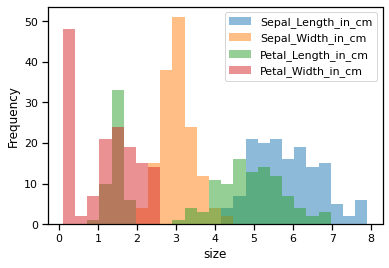

In [8]:
#A single plot with histograms for each feature ("Sepal_Length_in_cm","Sepal_Width_in_cm","Petal_Length_in_cm","Petal_Width_in_cm") overlayed
import seaborn as sns
sns.set_context('notebook')
ax=df_iris.plot.hist(bins=25,alpha=0.5)
ax.set_xlabel('size')

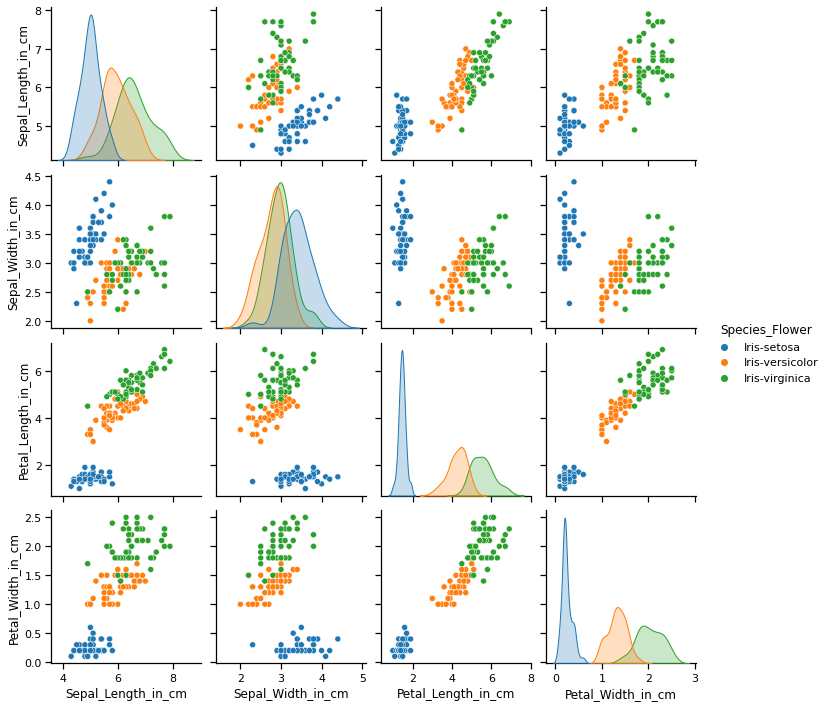

In [10]:
# pairwise relationships in a dataset.
sns.pairplot(df_iris,hue="Species_Flower")

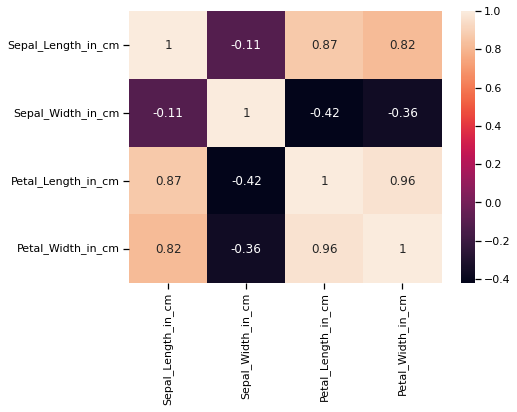

In [11]:
#rectangular data as a color-encoded matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.heatmap(df_iris.corr(), annot=True)
plt.show()

## Splitting data into train and test sets accordingly

In [15]:
#To encode target labels with value between 0 and n_classes-1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_iris['Species_Flower'] = le.fit_transform(df_iris['Species_Flower'])
df_iris

,Sepal_Length_in_cm,Sepal_Width_in_cm,Petal_Length_in_cm,Petal_Width_in_cm,Species_Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
from sklearn.model_selection import train_test_split
X = df_iris.drop(columns=['Species_Flower'])
Y = df_iris['Species_Flower']
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3)

## Training the model using Linear Support Vector Classification

In [17]:
#Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm
#so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.
from sklearn.svm import LinearSVC
Li_svc=LinearSVC()
Li_svc.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

## Predicting on the trained model

In [19]:
y_pred=Li_svc.predict(x_test)

## Report on how well the model works

In [22]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report
score=accuracy_score(y_test,y_pred)
print('Linear Support Vector Classification')
classification_report(y_test,y_pred)
print(f'Accuracy: {round(score*100,6)}%')

Linear Support Vector Classification
Accuracy: 93.333333%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


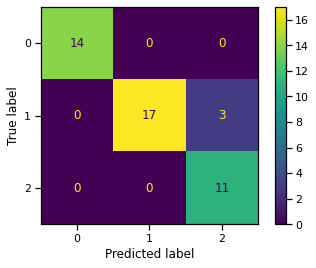

In [24]:
plot_confusion_matrix(Li_svc,x_test,y_test)

# ***By: Komal Reddy K***